# Analysis on new Bundesliga 2 signing Daniel Kyerewaa


- Daniel is a right winger who has played for Bundesliga 2 side Munster for the last two seasons.
- Using his performance data and rough assumption of Bundesliga 2 vs League one difficulty, I will be translating his performance to see what we can expect from him in the 25/26 League 1 for Reading FC
- Bundesliga 2 is considered more difficult than League one but not as tough as the championship so depending on the stat, will be using a 1.1-1.35 x multiplyer

In [33]:
import pandas as pd

df = pd.read_csv('../../data/daniel_kyerewaa_analysis.csv')
df.head()


,Name,Age,Rating,League,Club,Season,Appearances,Mins,Position,Alt_Pos,...,Pass_Percentage,Dribbles,Tackles,Interceptions,Fouls,Clearances,Blocks,Play_Style,Strengths,Weaknesses
0,Daniel Kyerewaa,23,6.7,Bundesliga2,Munster,24/25,20,878,RW,RWB,...,83.25,2.09,1.23,1.11,0.74,0.86,0,Likes to dribble,"Blocking the ball, Ball interception","Aerial duels, Passing"


In [34]:
df.columns

Index(['Name', 'Age', 'Rating', 'League', 'Club', 'Season', 'Appearances',
       'Mins', 'Position', 'Alt_Pos', 'Height', 'Foot', 'Goals', 'Assists',
       'Shots_Per_Game', 'Xg/90', 'Avg_Passes', 'Key_Passes',
       'Pass_Percentage', 'Dribbles', 'Tackles', 'Interceptions', 'Fouls',
       'Clearances', 'Blocks', 'Play_Style', 'Strengths', 'Weaknesses'],
      dtype='object')

In [35]:
# Normalize counting stats to a 34-game season 
# Per-game stats (multiply by max minutes)
# players can play the same games but not the same mins i.e, being a substitute 

import pandas as pd

# Full season minutes (46 games × 90 minutes)
full_season_mins = 34 * 90  # 3060 minutes

# Counting stats you want to normalize
counting_stats = ['Goals', 'Assists']

# Replace 0 minutes with NaN to avoid division errors
df['Mins'] = df['Mins'].replace(0, pd.NA)

# Normalize goals and assists by minutes played
for col in counting_stats:
    df[f'{col}_full_season'] = df[col] * (full_season_mins / df['Mins'])

# Select only the normalized goals and assists columns
normalized_cols = [f'{stat}_full_season' for stat in counting_stats]

# Print player names with normalized goals and assists
print(df[['Name'] + normalized_cols])




              Name  Goals_full_season  Assists_full_season
0  Daniel Kyerewaa          10.455581             3.485194


In [36]:
#printing normalised columns along with other columns for an easy view of Daniel Kyerewaas' 24/25 performance in the Bundesliga2

other_cols = ['Shots_Per_Game', 'Xg/90', 'Avg_Passes', 'Key_Passes', 'Pass_Percentage', 'Dribbles'] 

# The normalized columns for goals and assists
normalized_cols = ['Goals_full_season', 'Assists_full_season']

# Select Daniel’s row and print desired columns
print(df.loc[df['Name'] == 'Daniel Kyerewaa', other_cols + normalized_cols])


   Shots_Per_Game  Xg/90  Avg_Passes  Key_Passes  Pass_Percentage  Dribbles  \
0            1.72   0.31       25.73        0.62            83.25      2.09   

   Goals_full_season  Assists_full_season  
0          10.455581             3.485194  


In [37]:
# Translating performance to League one

# Multipliers for translating to League One level
multipliers = {
    'Shots_Per_Game': 1.2,
    'Xg/90': 1.25,
    'Avg_Passes': 1.05,
    'Key_Passes': 1.2,
    'Pass_Percentage': 1.02,
    'Dribbles': 1.15,
    'Goals_full_season': 1.3,
    'Assists_full_season': 1.25
}

# Apply only to Daniel Kyerewaa
daniel_mask = df['Name'].str.contains('Daniel Kyerewaa', case=False, na=False)

# For each stat, create a translated version
for stat, multiplier in multipliers.items():
    translated_stat = f'{stat}_LeagueOne'
    df.loc[daniel_mask, translated_stat] = df.loc[daniel_mask, stat] * multiplier

# Show Daniel's translated stats
translated_cols = [f'{stat}_LeagueOne' for stat in multipliers.keys()]
print(df.loc[daniel_mask, ['Name'] + translated_cols])


              Name  Shots_Per_Game_LeagueOne  Xg/90_LeagueOne  \
0  Daniel Kyerewaa                     2.064           0.3875   

   Avg_Passes_LeagueOne  Key_Passes_LeagueOne  Pass_Percentage_LeagueOne  \
0               27.0165                 0.744                     84.915   

   Dribbles_LeagueOne  Goals_full_season_LeagueOne  \
0              2.4035                    13.592255   

   Assists_full_season_LeagueOne  
0                       4.356492  


# Importing top League one Wingers in the 24/25 season to see how Daniel Kyerewaa would've ranked amognst them

In [38]:
import pandas as pd

# Load League One wingers data
df2 = pd.read_csv('../../data/league1_wingers.csv')
df2.head()

,Name,Age,Rating,Season,Appearances,Mins,Goals,Assists,Shots_Per_Game,Xg/90,Avg_Passes,Key_Passes,Pass_Percentage,Dribbles
0,Keshi Anderson,30,7.79,24/25,37,2220,7,5,1.1,0.18,24.7,1.2,82.3,1.3
1,Ryan Longman,24,7.22,24/25,19,1237,1,4,0.9,0.08,22.1,1.0,73.1,0.9
2,Tyreece Campbell,21,6.90,24/25,46,3541,7,1,1.4,0.11,16.6,1.0,78.2,1.5
3,Daniel Udoh,28,7.77,24/25,43,2677,9,3,1.3,0.28,12.6,0.7,69.4,0.7
4,Kwame Poku,23,7.30,24/25,27,2066,12,8,2.4,0.25,25.4,1.2,79.6,1.9


In [39]:
full_season_mins_league1 = 46 * 90  # 4140 minutes

# Replace 0 minutes with NaN to avoid division errors
df2['Mins'] = df2['Mins'].replace(0, pd.NA)

# Normalize the counting stats by minutes played
counting_stats = ['Goals', 'Assists'] 

for col in counting_stats:
    df2[f'{col}_full_season'] = df2[col] * (full_season_mins_league1 / df2['Mins'])


In [40]:
scaling_factor = full_season_mins_league1 / (34 * 90)  # 4140 / 3060

for stat in ['Goals_full_season', 'Assists_full_season']:
    df.loc[df['Name'].str.contains('Daniel Kyerewaa', case=False, na=False), f'{stat}_46g'] = \
        df.loc[df['Name'].str.contains('Daniel Kyerewaa', case=False, na=False), stat] * scaling_factor


In [41]:
import numpy as np

# Get Daniel's data as a dataframe with matching columns
daniel_stats = df.loc[df['Name'].str.contains('Daniel Kyerewaa', case=False, na=False), ['Name'] + [f'{stat}_46g' for stat in ['Goals_full_season', 'Assists_full_season']]]

# Rename columns to remove '_46g' suffix for consistency
daniel_stats.rename(columns={
    'Goals_full_season_46g': 'Goals_full_season',
    'Assists_full_season_46g': 'Assists_full_season'
}, inplace=True)

# Select same columns from league1 dataset
league1_stats = df2[['Name'] + [f'{stat}_full_season' for stat in counting_stats]]

# Combine into one dataframe
combined_df = pd.concat([league1_stats, daniel_stats], ignore_index=True, sort=False)


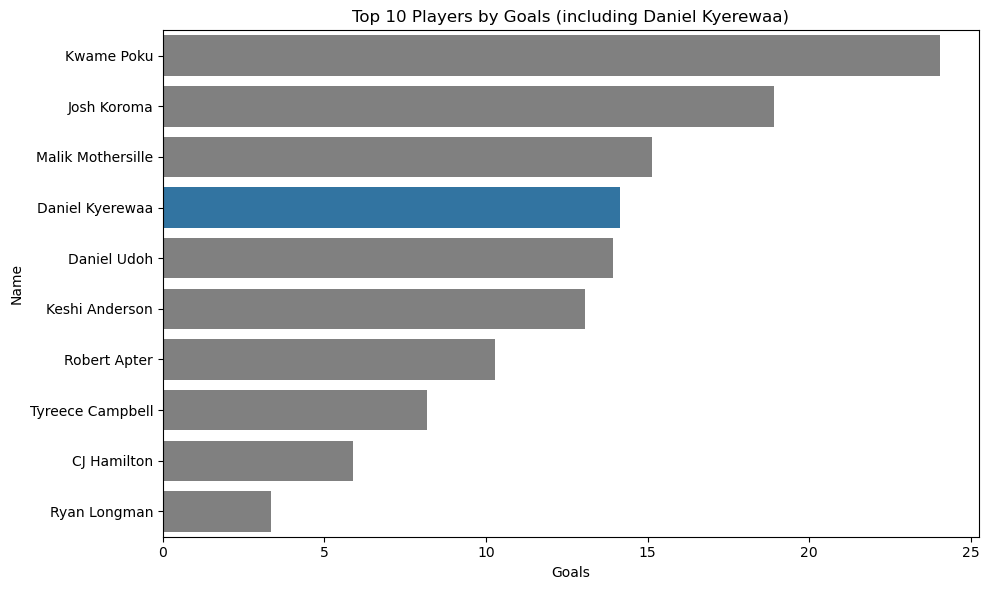

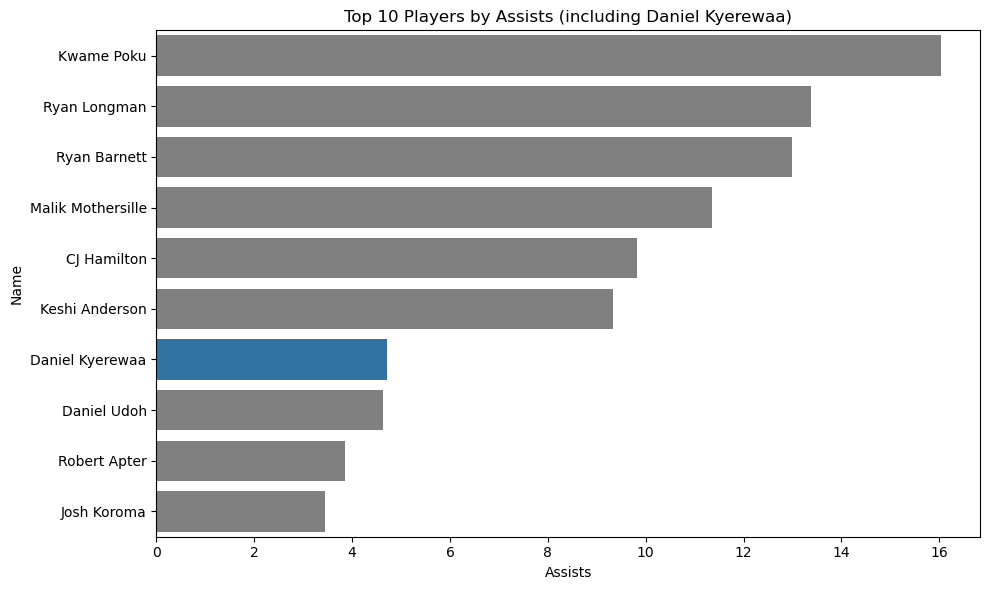

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_stat(df, stat_col, top_n=10):
    # Get top N players by stat descending
    top_players = df.sort_values(stat_col, ascending=False).head(top_n)

    # Adding Daniel Kyerewaa 
    if not top_players['Name'].str.lower().str.strip().eq('daniel kyerewaa').any():
        daniel_row = df[df['Name'].str.lower().str.strip() == 'daniel kyerewaa']
        top_players = pd.concat([top_players, daniel_row])

    # Sort ascending for horizontal barplot and invert y-axis so highest at top
    top_players = top_players.sort_values(stat_col, ascending=True)

    # Prepare color list: blue for Daniel Kyerewaa, grey for others
    clean_names = top_players['Name'].str.lower().str.strip()
    colors = ['#1f77b4' if name == 'daniel kyerewaa' else 'grey' for name in clean_names]

    plt.figure(figsize=(10,6))
    ax = sns.barplot(x=stat_col, y='Name', data=top_players, palette=colors)
    plt.title(f'Top {top_n} Players by {stat_col.replace("_full_season", "").capitalize()} (including Daniel Kyerewaa)')
    plt.xlabel(stat_col.replace('_full_season', '').capitalize())
    plt.ylabel('Name')
    plt.tight_layout()
    ax.invert_yaxis()  
    plt.show()

plot_top_stat(combined_df, 'Goals_full_season', top_n=10)
plot_top_stat(combined_df, 'Assists_full_season', top_n=10)



